In [3]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scipy.io 
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, glob, cv2

# packages needed for making a dataset: 
from torch.utils.data import DataLoader
from torchvision import transforms

from diffuser_utils import *
import dataset as ds
import models.spectral_model as sm
import models.machinelearning_forward as fm

from datetime import date, datetime

import sys
sys.path.append("..")

from models.unet import Unet
import models.unet3d as unet3d


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import dataset_helper_functions.read_pca_data as rpca
import csv

os.environ['CUDA_LAUNCH_BLOCKING'] = '1' 
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1" #choose the number of gpu that's free. It goes from 0-3

device = 'cuda:0'

### 2 image checkin

(1, 1)
[0.0011201784946024418]
0
0.0011201784946024418


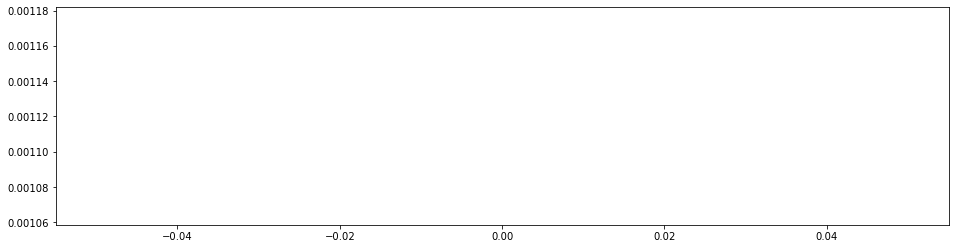

In [4]:
#testloss = torch.load("saved_models/checkpoint_2_symmetric_False/saved_model_ep1775_testloss_0.pt")
testloss_hd = torch.load("/home/cfoley_waller/10tb_extension/defocam/saved_models/saved_models/checkpoint_2_symmetric_False/saved_model_ep1765_testloss_0.pt")
#saved_lists = scipy.io.loadmat("saved_models/checkpoint_2_symmetric_False/saved_lists.mat")
saved_lists_hd = scipy.io.loadmat("/home/cfoley_waller/10tb_extension/defocam/"
                                  + "saved_models/saved_models/checkpoint_2_symmetric_False/"+
                                  "saved_lists.mat")
saved_lists_local = scipy.io.loadmat("saved_models/checkpoint_3_2_symmetric_False/saved_lists.mat")
opt_model = torch.load("/home/cfoley_waller/10tb_extension/defocam/saved_models/" 
                       + "saved_models/checkpoint_2_symmetric_False/"
                       +"saved_model_ep1590_testloss_0.02054610289633274.pt")

test_loss = saved_lists_local['test_loss']
print(test_loss.shape)
test_loss = np.array(test_loss)
plt.figure(figsize = (16,4))
lpf = [1/80] * 80
loss = [i for i in test_loss[0] if i != 0]
print(loss)
plt.plot(loss)
#plt.plot(np.convolve(lpf, loss, mode = 'valid'))
print(test_loss[0].tolist().index(min(loss)))
print(min(loss))

### 3 image checkin

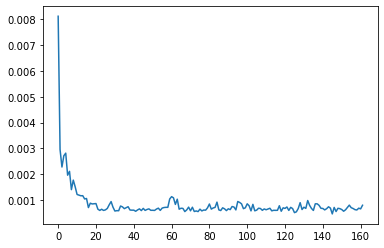

0.0004674650845117867
957


In [11]:
saved_lists_local = scipy.io.loadmat("../../10tb_extension/saved_models/saved_models/checkpoint_3_3_symmetric_False/saved_lists.mat")
test_loss = saved_lists_local['test_loss']
#remove zeros for unsaved testlosses
test_losses = [i for i in test_loss[0] if i != 0]
#remove duplicate values and plot
test_losses = list(set(test_losses))
plt.plot(test_losses)
plt.show()
print(min(test_losses))
index = test_loss.tolist()[0].index(min(test_losses))
print(index)

### 5 image checkin


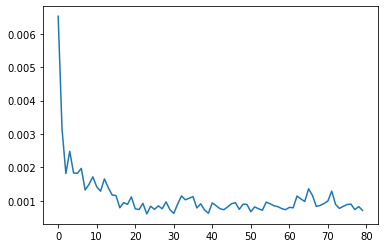

0.0006101074395701289
726


In [12]:
saved_lists_local = scipy.io.loadmat("saved_models/checkpoint_3_5_symmetric_False/saved_lists.mat")
test_loss = saved_lists_local['test_loss']
#remove zeros for unsaved testlosses
test_losses = [i for i in test_loss[0] if i != 0]
#remove duplicate values and plot
test_losses = list(set(test_losses))
plt.plot(test_losses)
plt.show()
print(min(test_losses))
index = test_loss.tolist()[0].index(min(test_losses))
print(index)